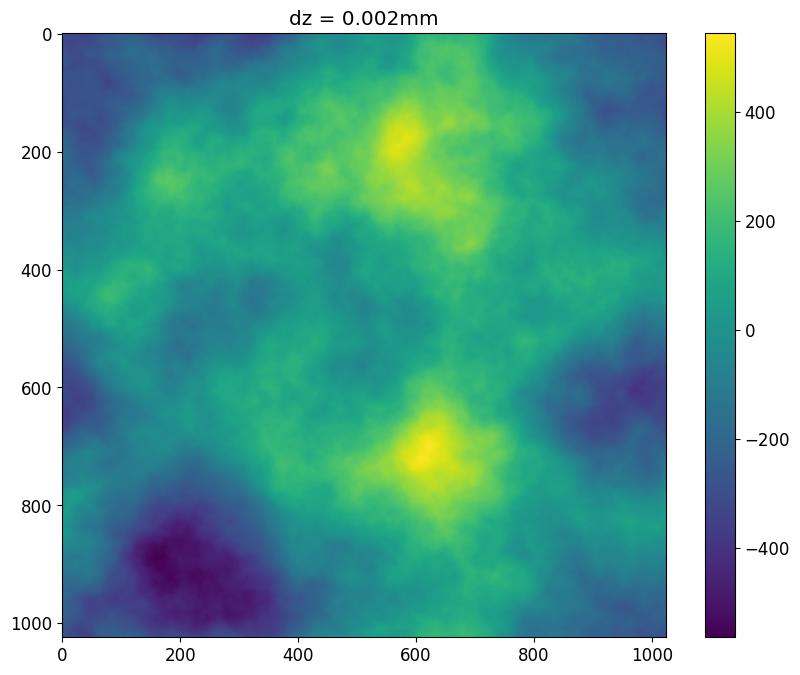

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.rcParams.update({'font.size': 12})

dz = 0.0020
field_name = f'BMSTU_phase_dz=-{dz:.4f}mm'
image = f'{field_name}.npy'
image_name = f'tie_phase_{field_name}.png'

figure(figsize=(10, 8), dpi=100)
plt.imshow(np.load(f'retrieved_phases/bmstu_phase_br_noise_intensity/{image}'))
plt.colorbar()
plt.title(f'dz = {dz}mm')
plt.show()

# plt.savefig(f'plots/{image_name}')

In [40]:
import os
from skimage.restoration import unwrap_phase
from mpl_toolkits.axes_grid1 import make_axes_locatable

phase = unwrap_phase(np.angle(np.load('../generation/fields/bmstu_phase/BMSTU_phase.npy')))
phase_z_tie = np.load(f'retrieved_phases/bmstu_phase/{image}')

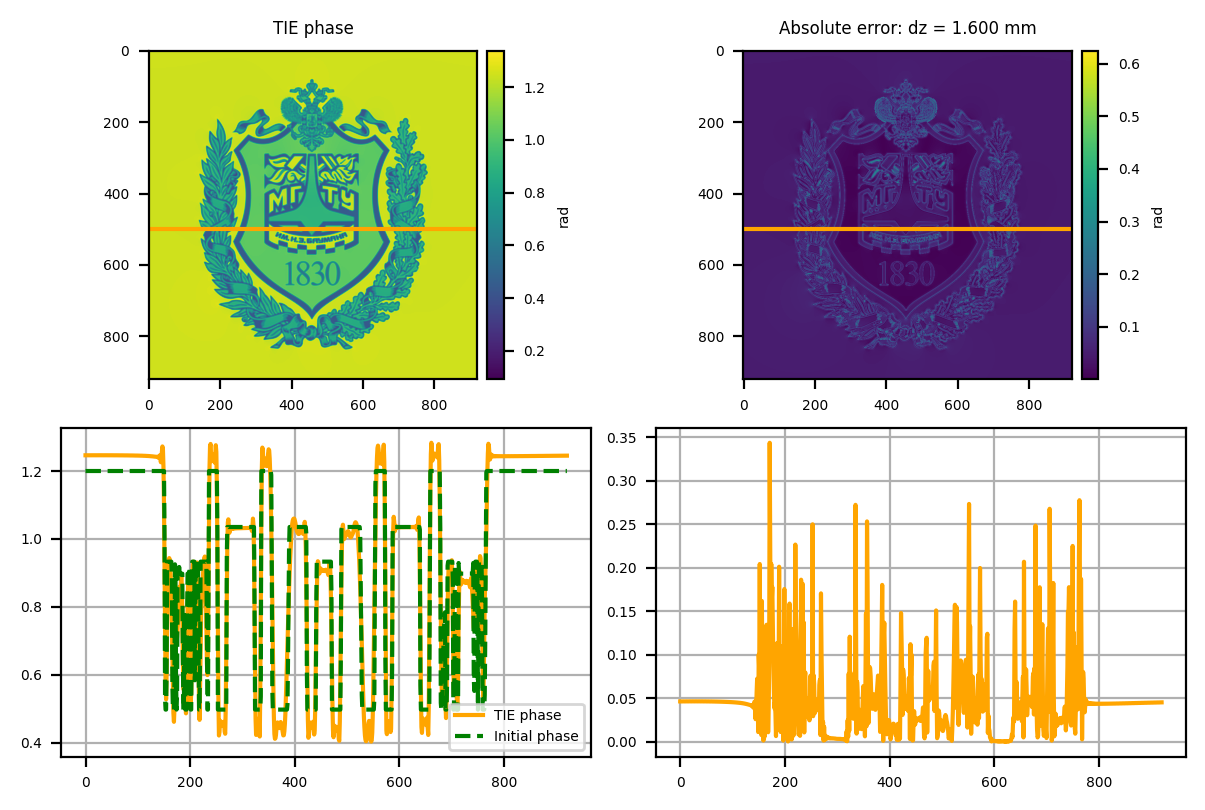

In [41]:
diff = phase[512, 55:-55] - phase_z_tie[512, 55:-55]
phase_z_tie += np.mean(diff)

height, width = phase.shape

def create_cbar(ax, img, label=None):
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = plt.colorbar(img, cax=cax)
    cbar.ax.set_ylabel(label)
    return cbar

plt.rcParams.update({'font.size': 5})

# Error
ap_i_ys, ap_i_yf = int(np.ceil(0.05 * height)), int(np.ceil(0.95 * height))
ap_i_xs, ap_i_xf = int(np.ceil(0.05 * width)), int(np.ceil(0.95 * width))
abs_error = np.abs(phase - phase_z_tie)[ap_i_ys:ap_i_yf, ap_i_xs:ap_i_xf]
phase_z_tie = phase_z_tie[ap_i_ys:ap_i_yf, ap_i_xs:ap_i_xf]
phase = phase[ap_i_ys:ap_i_yf, ap_i_xs:ap_i_xf]

# TIE
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, dpi=200)
i_vmin, i_vmax = None, None
p_vmin, p_vmax = None, None

img = ax1.imshow(phase_z_tie, vmin=p_vmin, vmax=p_vmax)
create_cbar(ax1, img, label='rad')

img = ax2.imshow(abs_error, vmin=p_vmin, vmax=p_vmax)
create_cbar(ax2, img, label='rad')

# Slices
y_slice = 500
color = 'orange'
ax3.plot(phase_z_tie[y_slice, :], color=color, label='TIE phase')
ax3.plot(phase[y_slice, :], color='green', linestyle='dashed',
         label='Initial phase')

ax4.plot(abs_error[y_slice, :], color=color)

ax1.axhline(y=y_slice, color=color)
ax2.axhline(y=y_slice, color=color)

ax1.set_title('TIE phase')
ax2.set_title(f'Absolute error: dz = {dz:.3f} mm')

ax3.grid()
ax4.grid()

ax3.legend()

fig.tight_layout()
path = os.path.join('plots', f'error dz = {dz:.3f} mm.png')
fig.savefig(path)


plt.show()